<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj14/regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(f"TensorFlow version: {tf.__version__}")

plt.rcParams["font.size"] = 15

TensorFlow version: 2.19.0


In [2]:
# ===========================================
# 1. Generowanie danych
# ===========================================

np.random.seed(42)
tf.random.set_seed(42)

# Prawdziwe parametry prostej: y = 0.2x + 0.8
a_true = 0.2
b_true = 0.8

# Generujemy dane treningowe
n_samples = 100
X_train = np.random.uniform(-2, 3, n_samples).reshape(-1, 1)
noise = np.random.normal(0, 0.1, n_samples).reshape(-1, 1)
y_train = a_true * X_train + b_true + noise

# Dane testowe
X_test = np.random.uniform(-2, 3, 30).reshape(-1, 1)
y_test = a_true * X_test + b_true + np.random.normal(0, 0.1, 30).reshape(-1, 1)

print(f"Dane treningowe: {X_train.shape}")
print(f"Dane testowe: {X_test.shape}")

Dane treningowe: (100, 1)
Dane testowe: (30, 1)


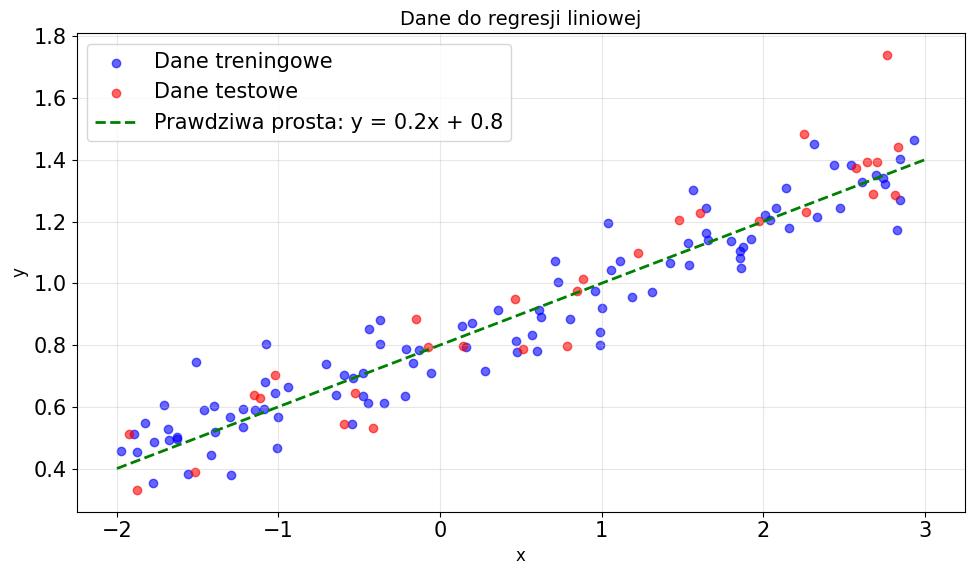

In [3]:
# ===========================================
# 2. Wizualizacja danych
# ===========================================

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(X_train, y_train, c='blue', alpha=0.6, label='Dane treningowe')
ax1.scatter(X_test, y_test, c='red', alpha=0.6, label='Dane testowe')

x_line = np.linspace(-2, 3, 100)
ax1.plot(x_line, a_true * x_line + b_true, 'g--', linewidth=2,
         label=f'Prawdziwa prosta: y = {a_true}x + {b_true}')

ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Dane do regresji liniowej', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:
# ===========================================
# 3. Budowanie modelu - NAJPROSTSZY
# ===========================================

print("\n" + "="*50)
print("MODEL 1: Najprostsza sieć (1 neuron)")
print("="*50)

# Najprostsza możliwa sieć - jeden neuron bez aktywacji
# To jest dokładnie regresja liniowa: y = Wx + b
model_simple = keras.Sequential([
    layers.Dense(1, input_shape=(1,))  # 1 neuron, 1 wejście
])

# Wyświetl architekturę
model_simple.summary()

# Kompilacja - wybieramy optymalizator i funkcję straty
model_simple.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),  # Stochastic Gradient Descent
    loss='mse'  # Mean Squared Error - suma kwadratów błędów
)


MODEL 1: Najprostsza sieć (1 neuron)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# ===========================================
# 4. Trenowanie modelu
# ===========================================

print("\nTrenowanie modelu...")

# Historia treningu - zapisujemy błąd w każdej epoce
history_simple = model_simple.fit(
    X_train, y_train,
    epochs=100,           # Liczba przejść przez cały zbiór danych
    batch_size=32,        # Ile próbek na raz
    validation_data=(X_test, y_test),  # Dane do walidacji
    verbose=0             # Nie wyświetlaj postępu
)

print("Trenowanie zakończone!")

# Pobierz nauczone wagi
weights = model_simple.get_weights()
a_learned = weights[0][0][0]
b_learned = weights[1][0]

print(f"\nNauczone parametry:")
print(f"  a (nachylenie) = {a_learned:.4f}  (prawdziwe: {a_true})")
print(f"  b (wyraz wolny) = {b_learned:.4f}  (prawdziwe: {b_true})")


Trenowanie modelu...
Trenowanie zakończone!

Nauczone parametry:
  a (nachylenie) = 0.2004  (prawdziwe: 0.2)
  b (wyraz wolny) = 0.8080  (prawdziwe: 0.8)


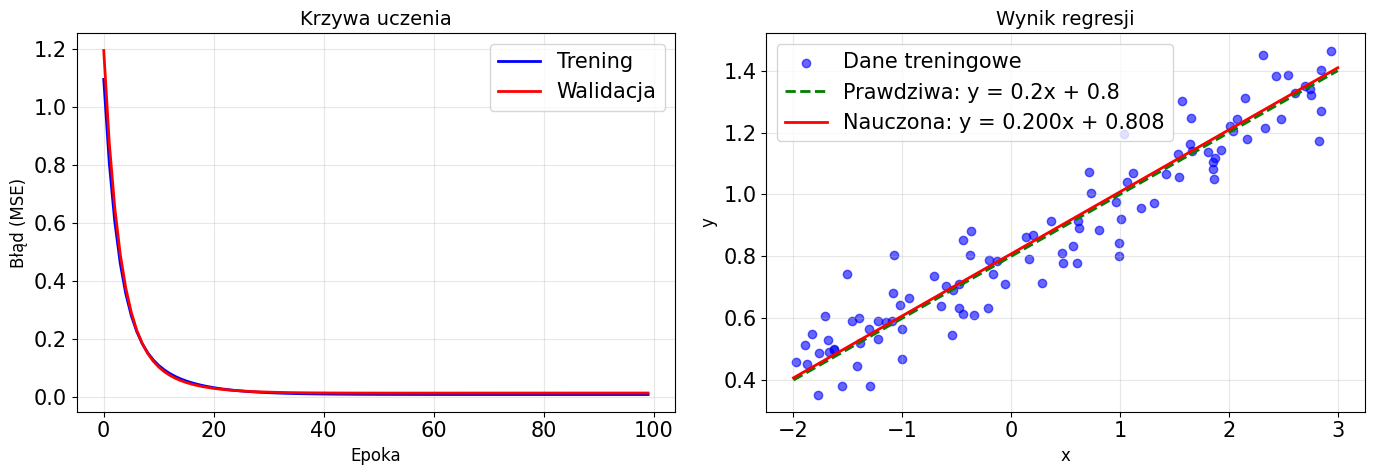

In [6]:
# ===========================================
# 5. Wizualizacja procesu uczenia
# ===========================================

fig2, axes = plt.subplots(1, 2, figsize=(14, 5))

# Lewy: krzywa uczenia (loss)
axes[0].plot(history_simple.history['loss'], 'b-', linewidth=2, label='Trening')
axes[0].plot(history_simple.history['val_loss'], 'r-', linewidth=2, label='Walidacja')
axes[0].set_xlabel('Epoka', fontsize=12)
axes[0].set_ylabel('Błąd (MSE)', fontsize=12)
axes[0].set_title('Krzywa uczenia', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Prawy: dopasowana prosta
axes[1].scatter(X_train, y_train, c='blue', alpha=0.6, label='Dane treningowe')
axes[1].plot(x_line, a_true * x_line + b_true, 'g--', linewidth=2,
             label=f'Prawdziwa: y = {a_true}x + {b_true}')
axes[1].plot(x_line, a_learned * x_line + b_learned, 'r-', linewidth=2,
             label=f'Nauczona: y = {a_learned:.3f}x + {b_learned:.3f}')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('Wynik regresji', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


PORÓWNANIE LEARNING RATE


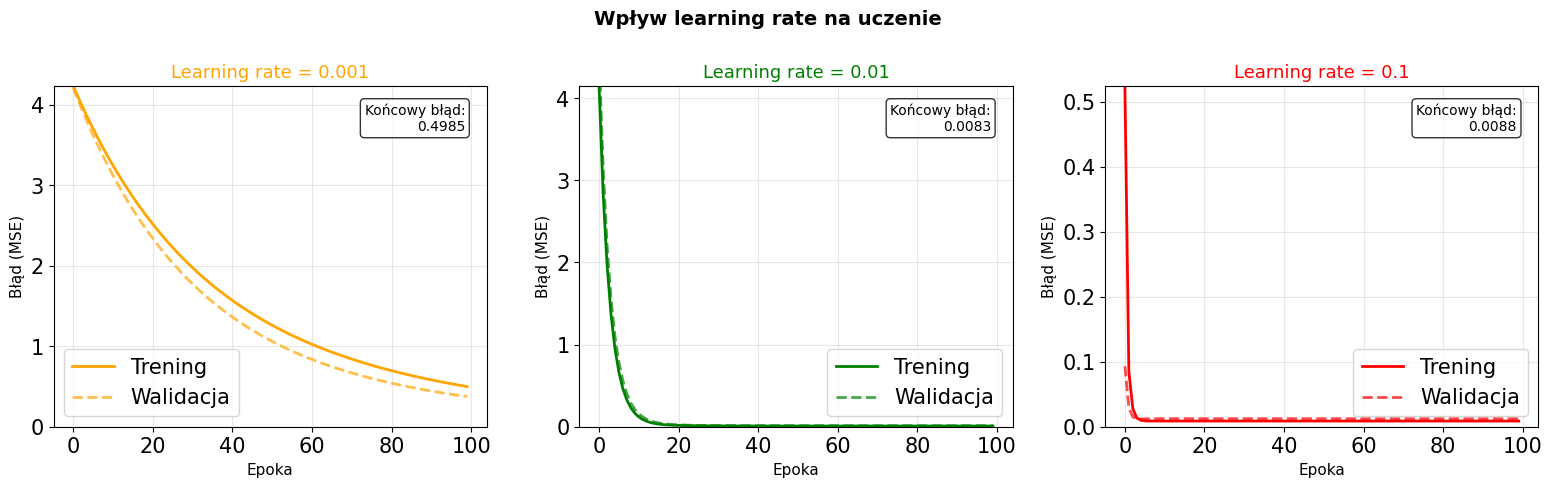

In [7]:
# ===========================================
# 6. Porównanie różnych learning rate
# ===========================================

print("\n" + "="*50)
print("PORÓWNANIE LEARNING RATE")
print("="*50)

learning_rates = [0.001, 0.01, 0.1]
colors = ['orange', 'green', 'red']
histories = []

fig3, axes3 = plt.subplots(1, 3, figsize=(16, 5))

for idx, (lr, color) in enumerate(zip(learning_rates, colors)):
    # Nowy model dla każdego lr
    model = keras.Sequential([
        layers.Dense(1, input_shape=(1,))
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=lr),
        loss='mse'
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0
    )

    histories.append(history)

    # Wykres
    axes3[idx].plot(history.history['loss'], color=color, linewidth=2, label='Trening')
    axes3[idx].plot(history.history['val_loss'], color=color, linewidth=2,
                    linestyle='--', alpha=0.7, label='Walidacja')
    axes3[idx].set_xlabel('Epoka', fontsize=11)
    axes3[idx].set_ylabel('Błąd (MSE)', fontsize=11)
    axes3[idx].set_title(f'Learning rate = {lr}', fontsize=13, color=color)
    axes3[idx].legend()
    axes3[idx].grid(True, alpha=0.3)
    axes3[idx].set_ylim(0, max(history.history['loss'][0], 0.5))

    # Końcowy błąd
    final_loss = history.history['loss'][-1]
    axes3[idx].text(0.95, 0.95, f'Końcowy błąd:\n{final_loss:.4f}',
                    transform=axes3[idx].transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Wpływ learning rate na uczenie', fontsize=14, fontweight='bold')
plt.tight_layout()


PORÓWNANIE OPTYMALIZATORÓW


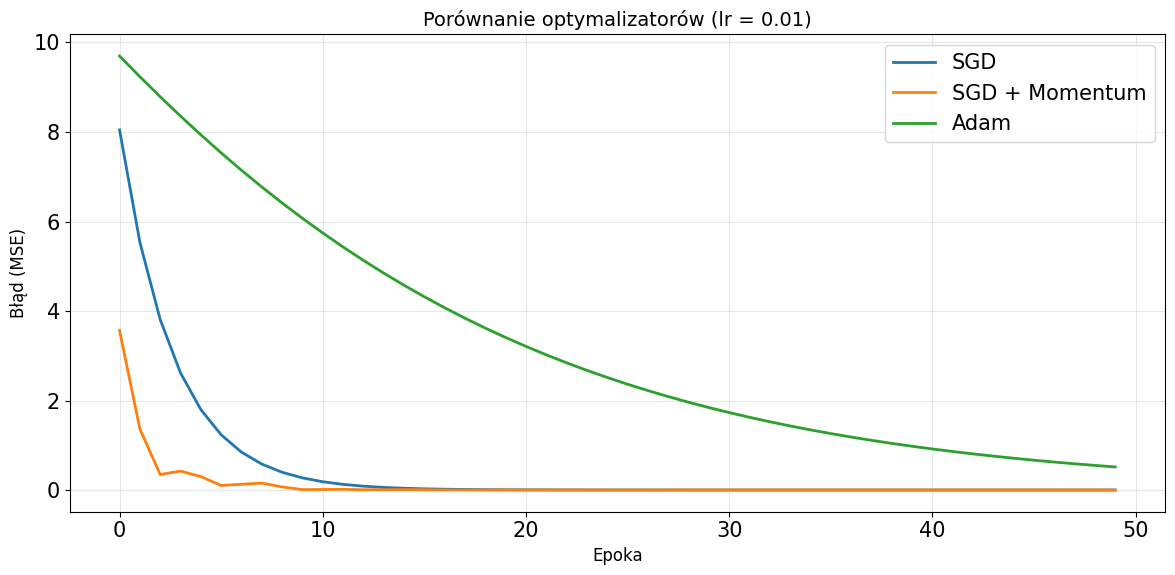

In [8]:
# ===========================================
# 7. Porównanie optymalizatorów
# ===========================================

print("\n" + "="*50)
print("PORÓWNANIE OPTYMALIZATORÓW")
print("="*50)

optimizers = [
    ('SGD', keras.optimizers.SGD(learning_rate=0.01)),
    ('SGD + Momentum', keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)),
    ('Adam', keras.optimizers.Adam(learning_rate=0.01))
]

fig4, ax4 = plt.subplots(figsize=(12, 6))

for name, optimizer in optimizers:
    model = keras.Sequential([
        layers.Dense(1, input_shape=(1,))
    ])

    model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        verbose=0
    )

    ax4.plot(history.history['loss'], linewidth=2, label=name)

ax4.set_xlabel('Epoka', fontsize=12)
ax4.set_ylabel('Błąd (MSE)', fontsize=12)
ax4.set_title('Porównanie optymalizatorów (lr = 0.01)', fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# ===========================================
# 8. Wizualizacja krok po kroku (GradientTape)
# ===========================================

print("\n" + "="*50)
print("GRADIENT TAPE - Ręczne obliczanie gradientu")
print("="*50)

# Inicjalizacja zmiennych (wag)
a_var = tf.Variable(0.8, dtype=tf.float32)  # Początkowe a
b_var = tf.Variable(0.2, dtype=tf.float32)  # Początkowe b

learning_rate = 0.01
n_epochs = 100

# Konwersja danych do tensorów
X_tensor = tf.constant(X_train.flatten(), dtype=tf.float32)
y_tensor = tf.constant(y_train.flatten(), dtype=tf.float32)

# Historia do wizualizacji
history_a = [a_var.numpy()]
history_b = [b_var.numpy()]
history_loss = []

for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = a_var * X_tensor + b_var

        # Oblicz loss (MSE)
        loss = tf.reduce_mean(tf.square(y_tensor - y_pred))

    # Oblicz gradienty
    gradients = tape.gradient(loss, [a_var, b_var])

    # Aktualizuj wagi (gradient descent)
    a_var.assign_sub(learning_rate * gradients[0])
    b_var.assign_sub(learning_rate * gradients[1])

    # Zapisz historię
    history_a.append(a_var.numpy())
    history_b.append(b_var.numpy())
    history_loss.append(loss.numpy())

print(f"Końcowe wartości:")
print(f"  a = {a_var.numpy():.4f} (prawdziwe: {a_true})")
print(f"  b = {b_var.numpy():.4f} (prawdziwe: {b_true})")


GRADIENT TAPE - Ręczne obliczanie gradientu
Końcowe wartości:
  a = 0.2222 (prawdziwe: 0.2)
  b = 0.6911 (prawdziwe: 0.8)


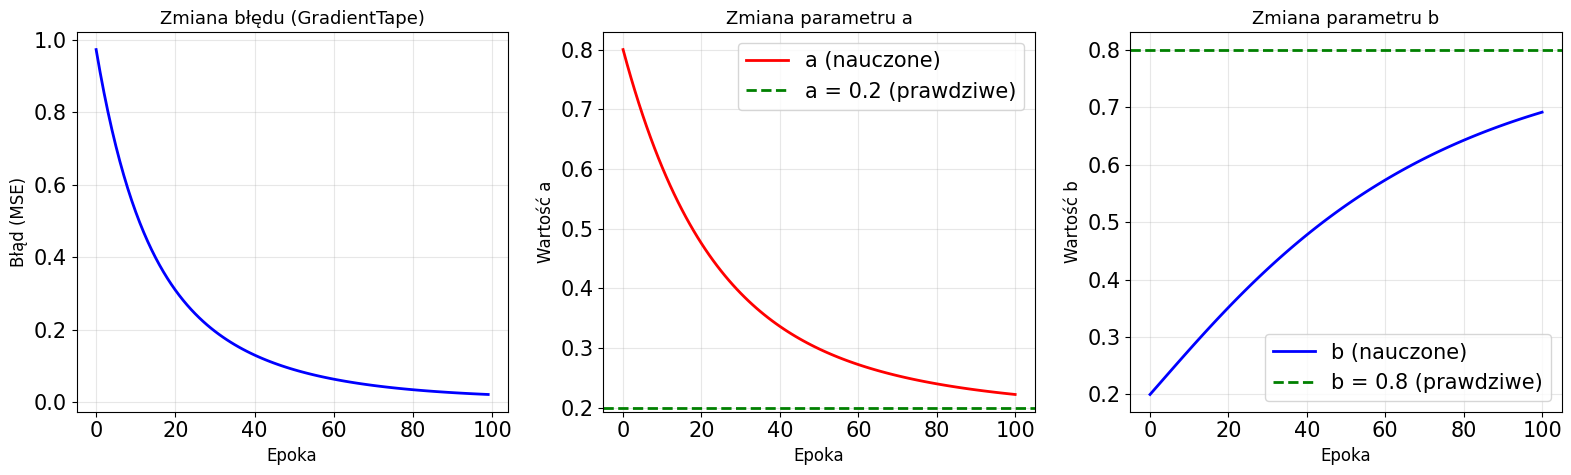

In [10]:
# Wizualizacja
fig5, axes5 = plt.subplots(1, 3, figsize=(16, 5))

# Loss
axes5[0].plot(history_loss, 'b-', linewidth=2)
axes5[0].set_xlabel('Epoka', fontsize=12)
axes5[0].set_ylabel('Błąd (MSE)', fontsize=12)
axes5[0].set_title('Zmiana błędu (GradientTape)', fontsize=13)
axes5[0].grid(True, alpha=0.3)

# Parametr a
axes5[1].plot(history_a, 'r-', linewidth=2, label='a (nauczone)')
axes5[1].axhline(y=a_true, color='g', linestyle='--', linewidth=2, label=f'a = {a_true} (prawdziwe)')
axes5[1].set_xlabel('Epoka', fontsize=12)
axes5[1].set_ylabel('Wartość a', fontsize=12)
axes5[1].set_title('Zmiana parametru a', fontsize=13)
axes5[1].legend()
axes5[1].grid(True, alpha=0.3)

# Parametr b
axes5[2].plot(history_b, 'b-', linewidth=2, label='b (nauczone)')
axes5[2].axhline(y=b_true, color='g', linestyle='--', linewidth=2, label=f'b = {b_true} (prawdziwe)')
axes5[2].set_xlabel('Epoka', fontsize=12)
axes5[2].set_ylabel('Wartość b', fontsize=12)
axes5[2].set_title('Zmiana parametru b', fontsize=13)
axes5[2].legend()
axes5[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()